In [1]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mapping import Mapping

%load_ext version_information
%version_information numpy, pandas, matplotlib
%version_information
fig_prefix = "../figures/2018-07-22-jw-weaselball-starting_location_"
data_prefix = "../data/2018-07-22-jw-weaselball-starting_location_"


In [2]:
df = pd.read_csv('../data/2018-07-22-jw-weaselball_analysis_translation_matrix_out.csv')
print(df.shape)
df = df.apply(pd.to_numeric)
df.head()

(6300, 6300)


,0,1,2,3,4,5,6,7,8,9,...,6290,6291,6292,6293,6294,6295,6296,6297,6298,6299
0,0.222222,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.090909,0.173554,0.033058,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.060150,0.285714,0.030075,0.015038,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.070000,0.240000,0.030000,0.020000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.016949,0.050847,0.262712,0.033898,0.008475,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_import_m = pd.read_csv('../data/2018-07-22-jw-weaselball_analysis_magnitude_vector_out.csv',  header=None);
magnitude_V = df_import_m.iloc[:,0]
magnitude_V = magnitude_V.apply(pd.to_numeric)
magnitude_V = magnitude_V.astype(float)
magnitude_V.head()

0    134.0
1    144.0
2    172.0
3    136.0
4    153.0
Name: 0, dtype: float64

In [4]:
NUMBER_OF_SQUARES = 100 #This should be a square number to create equal sized squares.
RESOLUTION_OF_S1 = 0.1 #This is used to discretize the yaw angle over 0 - 2*pi
START_X = 0
START_Y = 0
END_X = 9
END_Y = 9
END_YAW = 0
counter = 0

In [5]:
#The formula for mapping a 3D array to 1D is
#(z * xMax * yMax) + (y * xMax) + x;
#https://stackoverflow.com/questions/7367770/how-to-flatten-or-index-3d-array-in-1d-array
X_MAX = NUMBER_OF_SQUARES ** (1/2.0)
Y_MAX = NUMBER_OF_SQUARES ** (1/2.0)
YAW_MAX = (2 * np.pi) / RESOLUTION_OF_S1
mapping = Mapping(X_MAX, Y_MAX, YAW_MAX)#Fill in the logical areas that the system can reach (For now I am assuming it can go up/down 2 yaw states or the surronding (x,y) blocks)

In [6]:
#https://vknight.org/unpeudemath/code/2015/11/15/Visualising-markov-chains.html
#http://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017

In [7]:
#Use Dijkstras to find shortest path to goal
#https://gist.github.com/kachayev/5990802
from collections import defaultdict
from heapq import *

def dijkstra(edges, f, t):
    #Create dict to represent graph
    g = defaultdict(list)
    #add edges to dictionary
    for l,r,c in edges:
        g[l].append((c,r))


    q, seen, mins = [(1,f,())], set(), {f: 0}
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 in seen: continue
                prev = mins.get(v2, None)
                next = -abs(cost * c)
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(q, (next, v2, path))

    return (float("inf"),)

In [8]:
#Convert translation matrix into edges for graph
edges = []
total_runs = magnitude_V.sum()
for col in df.columns:
    for idx in df.index:
        if(df.loc[idx,col] != 0):
            edges.append((int(col), int(idx), -df.loc[idx,col] ))
            # I am considering appending *(magnitude_V[idx]/total_runs) to df.loc so that way we also consider how often a state has been visited
            


In [9]:

#
#
print "({},{},x) -> ({},{},{}):".format(START_X, START_Y, END_X, END_Y, END_YAW)
x = range(int(np.pi/RESOLUTION_OF_S1))
x_results = []
for i in x:
    x_results.append(dijkstra(edges, mapping.map3Dto1D(START_X,START_Y,i), mapping.map3Dto1D(END_X,END_Y,END_YAW)))
print(x_results)
(m,i) = min((v,i) for i,v in enumerate(x_results))
print "State {} to state {}".format(mapping.map3Dto1D(START_X,START_Y,i), mapping.map3Dto1D(END_X,END_Y,END_YAW))
print "Min is x = {} with P = {}".format(i,m)



(0,0,x) -> (9,9,0):
[(-7.347432720567051e-05, (99, (6198, (6099, (0, ()))))), (-0.00028763183125599237, (99, (299, (100, ())))), (-0.002876318312559924, (99, (299, (200, ())))), (-0.003451581975071908, (99, (299, (300, ())))), (-0.011792905081495688, (99, (299, (400, ())))), (-0.003163950143815916, (99, (299, (500, ())))), (-0.0006144393241167436, (99, (599, (600, ())))), (-5.2412803238304875e-05, (99, (599, (699, (700, ()))))), (-5.6444557333559095e-05, (99, (599, (699, (800, ()))))), (-6.53077522867626e-06, (99, (599, (699, (800, (900, ())))))), (-5.120327700972862e-05, (99, (599, (1000, ())))), (-5.120327700972862e-05, (99, (599, (1100, ())))), (-9.990883318971439e-07, (99, (599, (1100, (1200, ()))))), (-1.2488604148714298e-06, (99, (599, (1100, (1300, ()))))), (-1.5316523263396925e-07, (99, (199, (698, (1399, (1400, ())))))), (-7.585670668107943e-07, (99, (599, (1000, (1500, ()))))), (-7.808778628934649e-08, (99, (599, (1000, (1500, (1600, ())))))), (-7.658261631698463e-08, (99, (1

In [10]:
#Take best path and make it into list of x,y,yaw points
import re
prob = m[0]
best_tuple = m[1]
best_list = re.findall(r'\d+', str(best_tuple))
best_list = map(int, best_list)
best_list = reversed(best_list)
best_list = map(mapping.map1Dto3D, best_list)
best_list

[(0, 0, 4), (9, 9, 2), (9, 9, 0)]

In [11]:
#Turn (x,y,yaw) into lists that quiver likes X_start, Y_start, X_end, Y_end for all arrows
start_X = []
start_Y = []
end_X = []
end_Y = []
for i in range(len(best_list)-1):
    curr_tuple = best_list[i]
    next_tuple = best_list[i+1]
    start_X.append(curr_tuple[0])
    start_Y.append(curr_tuple[1])
    end_X.append(next_tuple[0] - curr_tuple[0])
    end_Y.append(next_tuple[1] - curr_tuple[1])

In [12]:
xvalues = np.array(range(int(X_MAX)))
yvalues = np.array(range(int(Y_MAX)))

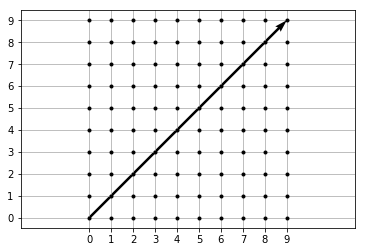

In [13]:
xx, yy = np.meshgrid(xvalues, yvalues)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(start_X, start_Y, end_X, end_Y, angles='xy', scale_units='xy', scale = 1)
plt.axis('equal')
plt.xticks(range(10))
plt.yticks(range(10))

plt.grid()
plt.plot(xx, yy, marker='.', color='k', linestyle=' ')